# Sampling and Hypothesis Testing

In [69]:
#Libraries
import numpy as np 
import pandas as pd 
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
import os

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [70]:
df = pd.read_csv("2018-data-for-consulates.csv")
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [71]:
# Code here

# Firstly, .strip() was used to remove the spaces on the left and right side of the column names. Then I simply renamed the 
# columns by replacing the space with underscore.

df.columns = df.columns.str.strip()

df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True) 

df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Airport_transit_visas_(ATVs)_applied_for,ATVs_issued_(including_multiple),Multiple_ATVs_issued,ATVs_not_issued,Not_issued_rate_for_ATVs,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Total_ATVs_and_uniform_visas_applied_for,"Total_ATVs_and_uniform_visas_issued__(including_multiple_ATVs,_MEVs_and_LTVs)",Total_ATVs_and_uniform_visas_not_issued,Not_issued_rate_for_ATVs_and_uniform_visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [72]:
# Before dropping the ATV columns, we had 19 columns. 

df.shape

(1913, 19)

In [73]:
#Code here

# The ATV columns were simply filtered out using regex and then dropped.

df.drop(list(df.filter(regex = 'ATV')), axis = 1, inplace = True)
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


In [74]:
# After dropping, we are left with 10 columns. 

df.shape

(1913, 10)

In [75]:
# In order to make our columns more readable and better fit for our Data Analysis, they were renamed with appropriate key terms.

df.rename(columns={'Schengen_State': 'sch_state', 'Country_where_consulate_is_located': 'consulate_country', 'Consulate' : 'consulate'}, inplace=True)

df.rename(columns={'Uniform_visas_applied_for': 'uv_applied', 'Total__uniform_visas_issued_(including_MEV)': 'uv_mev_issued', 'Multiple_entry_uniform_visas_(MEVs)_issued' : 'mev_issued'}, inplace=True)

df.rename(columns={'Share_of_MEVs_on_total_number_of_uniform_visas_issued': 'mev_issued_%', 'Total_LTVs_issued': 'ltv_issued', 'Uniform_visas_not_issued' : 'uv_not_issued', 'Not_issued_rate_for_uniform_visas' : 'uv_not_issued_%'}, inplace=True)

df.head()

,sch_state,consulate_country,consulate,uv_applied,uv_mev_issued,mev_issued,mev_issued_%,ltv_issued,uv_not_issued,uv_not_issued_%
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [76]:
# This indicates the number of NAN Values before they countered against.

df.isnull().sum()

sch_state             13
consulate_country     13
consulate             10
uv_applied            14
uv_mev_issued         54
mev_issued           147
mev_issued_%         150
ltv_issued           846
uv_not_issued        361
uv_not_issued_%      363
dtype: int64

In [77]:
# Code here

# In order to counter the Null Values, for sch_state they were simply dropped.
# For the quantitative columns, the irregular terms such as % and , were removed and then the NAN values were replaced by 0 
# and the converted to float. Float was used because there were some values that had decimals in them.

df.dropna(subset=['sch_state'], inplace=True)

newdf = df.loc[:, 'uv_applied' : 'uv_not_issued_%']

colstocheck = newdf.columns

newdf[colstocheck] = newdf[colstocheck].replace({'\%':''}, regex = True)

newdf[colstocheck] = newdf[colstocheck].replace({',':''}, regex = True)

newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']] = newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']].astype(str)

newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']] = newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']].replace('nan', 0)

newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']] = newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']].astype(float)

df[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']] = newdf[['uv_applied', 'uv_mev_issued', 'mev_issued', 'mev_issued_%', 'ltv_issued', 'uv_not_issued', 'uv_not_issued_%']]


In [78]:
df.head()

,sch_state,consulate_country,consulate,uv_applied,uv_mev_issued,mev_issued,mev_issued_%,ltv_issued,uv_not_issued,uv_not_issued_%
0,Austria,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5
1,Austria,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1
2,Austria,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0
3,Austria,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4
4,Austria,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0


In [79]:
#Print Summary again

# As seen, no Null Values remained in the dataset. 

df.isnull().sum() 

sch_state            0
consulate_country    0
consulate            0
uv_applied           0
uv_mev_issued        0
mev_issued           0
mev_issued_%         0
ltv_issued           0
uv_not_issued        0
uv_not_issued_%      0
dtype: int64

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [80]:
#Code here
df['decisions'] = df.uv_mev_issued + df.ltv_issued + df.uv_not_issued 

df['rejection_rate'] = (df.uv_not_issued / df.decisions) * 100

In [81]:
df.head()

,sch_state,consulate_country,consulate,uv_applied,uv_mev_issued,mev_issued,mev_issued_%,ltv_issued,uv_not_issued,uv_not_issued_%,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5,62.0,14.516129
1,Austria,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1,2481.0,33.131802
2,Austria,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0,16.0,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4,2776.0,4.394813
4,Austria,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0,1976.0,3.997976


# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

*Write here*

Yes this assumption makes sense and its important to make this assumption because for our test, we're assuming there is no explicit difference between the population and the sample. Meaning that our treatment group and control group both are unaware of their roles and this reduces our bias. This actually correlates with the Null Hypothesis which treats both of the groups as same and the difference resulting is random.  


#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

# a) Pie Charts

#  Egypt

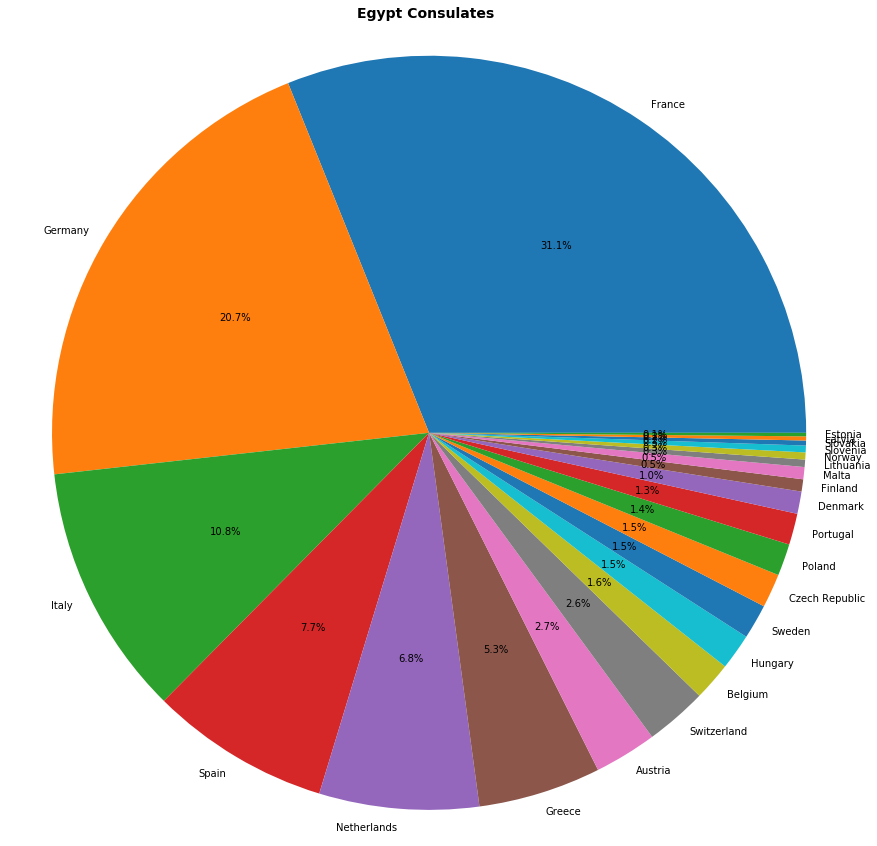

In [82]:
#Code here
egypt_df = df[df['consulate_country'] == 'EGYPT']

my_consulates = egypt_df.groupby('sch_state')['decisions'].sum().nlargest(len(egypt_df))

egypt_label = my_consulates.index 

plt.figure(figsize=(15,15))
plt.pie(my_consulates, autopct='%1.1f%%', labels = egypt_label, labeldistance=1.05)
plt.title('Egypt Consulates', weight='bold', size=14)
plt.axis('equal')
plt.show()


# India

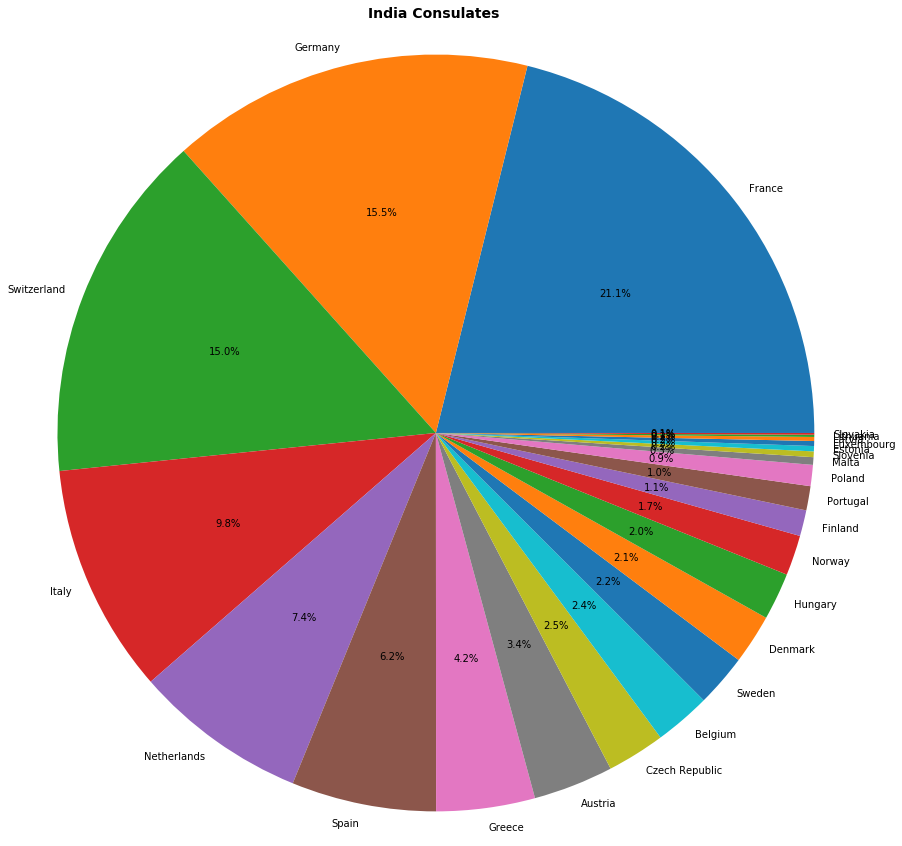

In [83]:
india_df = df[df['consulate_country'] == 'INDIA']

my_consulates_two = india_df.groupby('sch_state')['decisions'].sum().nlargest(len(india_df))

india_label = my_consulates_two.index 

plt.figure(figsize=(15,15))
plt.pie(my_consulates_two, autopct='%1.1f%%', labels = india_label, labeldistance=1.05)
plt.title('India Consulates', weight='bold', size=14)
plt.axis('equal')
plt.show()


# Japan

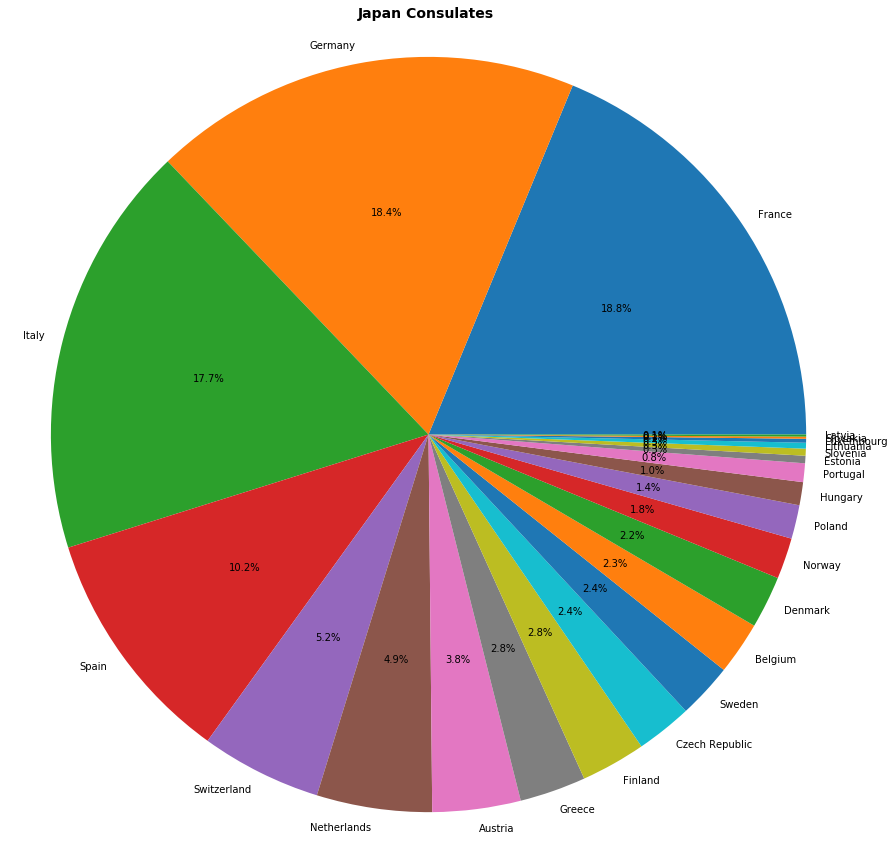

In [84]:
japan_df = df[df['consulate_country'] == 'JAPAN']

my_consulates_three = japan_df.groupby('sch_state')['decisions'].sum().nlargest(len(japan_df))

japan_label = my_consulates_three.index 

plt.figure(figsize=(15,15))
plt.pie(my_consulates_three, autopct='%1.1f%%', labels = japan_label, labeldistance=1.05)
plt.title('Japan Consulates', weight='bold', size=14)
plt.axis('equal')
plt.show()


# b) i) Rejection rate

# Egypt

In [85]:
egypt_df['accepted'] = egypt_df.decisions - egypt_df.uv_not_issued

accept = []
reject = []
my_arr = []

my_mean = (egypt_df['rejection_rate'].mean()) / 100

for i in egypt_df.iterrows():
    accept = [0 for x in range(int(i[1]['accepted']))]
    reject = [1 for x in range(int(i[1]['uv_not_issued']))]
    my_arr = accept + reject
    ttest,pval = ttest_1samp(my_arr, my_mean)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()
      

Pval:  0.03923537315400779
Country:  Estonia
We Accept Null Hypothesis

Pval:  0.4927881585147095
Country:  Latvia
We Accept Null Hypothesis

Pval:  0.2083656999224238
Country:  Slovenia
We Accept Null Hypothesis



# India

In [86]:
india_df['accepted'] = india_df.decisions - india_df.uv_not_issued

accept_two = []
reject_two = []
my_arr_two = []

my_mean_two = (india_df['rejection_rate'].mean()) / 100

for i in india_df.iterrows():
    accept_two = [0 for x in range(int(i[1]['accepted']))]
    reject_two = [1 for x in range(int(i[1]['uv_not_issued']))]
    my_arr_two = accept_two + reject_two
    ttest,pval = ttest_1samp(my_arr_two, my_mean_two)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()



Pval:  0.09008784891544572
Country:  Belgium
We Accept Null Hypothesis

Pval:  0.8418153330821265
Country:  Germany
We Accept Null Hypothesis

Pval:  0.7169374491235172
Country:  Spain
We Accept Null Hypothesis



# Japan

In [87]:
japan_df['accepted'] = japan_df.decisions - japan_df.uv_not_issued

accept_three = []
reject_three = []
my_arr_three = []

my_mean_three = (japan_df['rejection_rate'].mean()) / 100

for i in japan_df.iterrows():
    accept_three = [0 for x in range(int(i[1]['accepted']))]
    reject_three = [1 for x in range(int(i[1]['uv_not_issued']))]
    my_arr_three = accept_three + reject_three
    ttest,pval = ttest_1samp(my_arr_three, my_mean_three)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()


Pval:  0.05252498362888584
Country:  Belgium
We Accept Null Hypothesis

Pval:  0.9395330812903009
Country:  Estonia
We Accept Null Hypothesis

Pval:  0.4358498010797103
Country:  Finland
We Accept Null Hypothesis

Pval:  0.25511527301851616
Country:  Germany
We Accept Null Hypothesis

Pval:  0.884677535096405
Country:  Greece
We Accept Null Hypothesis

Pval:  0.8756053463047314
Country:  Lithuania
We Accept Null Hypothesis

Pval:  0.6651425102352464
Country:  Luxembourg
We Accept Null Hypothesis

Pval:  0.027478168330020585
Country:  Norway
We Accept Null Hypothesis

Pval:  0.2610383993559934
Country:  Poland
We Accept Null Hypothesis

Pval:  0.09362570575726312
Country:  Portugal
We Accept Null Hypothesis

Pval:  0.4808181268993471
Country:  Slovenia
We Accept Null Hypothesis

Pval:  0.2333158545690592
Country:  Sweden
We Accept Null Hypothesis

Pval:  0.32092560571586654
Country:  Switzerland
We Accept Null Hypothesis



# b) ii) Multi-Entry Visa Share 

# Egypt

In [88]:
egypt_df['difference'] = egypt_df.uv_mev_issued - egypt_df.mev_issued

accept_four = []
reject_four = []
my_arr_four = []

my_mean_four = (egypt_df['mev_issued_%'].mean()) / 100

for i in egypt_df.iterrows():
    accept_four = [0 for x in range(int(i[1]['difference']))]
    reject_four = [1 for x in range(int(i[1]['mev_issued']))]
    my_arr_four = accept_four + reject_four
    ttest,pval = ttest_1samp(my_arr_four, my_mean_four)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()


Pval:  0.06157810959035441
Country:  Estonia
We Accept Null Hypothesis

Pval:  0.10023232936108525
Country:  Latvia
We Accept Null Hypothesis



# India

In [89]:
india_df['difference'] = india_df.uv_mev_issued - india_df.mev_issued

accept_five = []
reject_five = []
my_arr_five = []

my_mean_five = (india_df['mev_issued_%'].mean()) / 100

for i in india_df.iterrows():
    accept_five = [0 for x in range(int(i[1]['difference']))]
    reject_five = [1 for x in range(int(i[1]['mev_issued']))]
    my_arr_five = accept_five + reject_five
    ttest,pval = ttest_1samp(my_arr_five, my_mean_five)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()
        
print("All p-Values were Rejected in this Case")


All p-Values were Rejected in this Case


# Japan

In [90]:
japan_df['difference'] = japan_df.uv_mev_issued - japan_df.mev_issued

accept_six = []
reject_six = []
my_arr_six = []

my_mean_six = (japan_df['mev_issued_%'].mean()) / 100

for i in japan_df.iterrows():
    accept_six = [0 for x in range(int(i[1]['difference']))]
    reject_six = [1 for x in range(int(i[1]['mev_issued']))]
    my_arr_six = accept_six + reject_six
    ttest,pval = ttest_1samp(my_arr_six, my_mean_six)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()


Pval:  0.6683546839972665
Country:  Estonia
We Accept Null Hypothesis

Pval:  0.08450095917406912
Country:  Greece
We Accept Null Hypothesis

Pval:  0.22409594767671795
Country:  Slovakia
We Accept Null Hypothesis

Pval:  0.032057926197961245
Country:  Slovenia
We Accept Null Hypothesis



# Weighted Score

# Egypt

In [91]:
egypt_df['before'] = (1 - (egypt_df['rejection_rate'] / 100)) * (egypt_df['mev_issued_%'] / 100) 

egypt_df['weighted'] = (egypt_df.before - egypt_df.before.min()) / (egypt_df.before.max() - egypt_df.before.min())                 

egypt_df['select'] = egypt_df.weighted * egypt_df.decisions

egypt_df['not_select'] = (1 - egypt_df.weighted) * egypt_df.decisions

accept_seven = []
reject_seven = []
my_arr_seven = []

my_mean_seven = (egypt_df['weighted'].mean())

for i in egypt_df.iterrows():
    accept_seven = [1 for x in range(int(i[1]['select']))]
    reject_seven = [0 for x in range(int(i[1]['not_select']))]
    my_arr_seven = accept_seven + reject_seven
    ttest,pval = ttest_1samp(my_arr_seven, my_mean_seven)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()
    

Pval:  0.025232548918042656
Country:  Finland
We Accept Null Hypothesis



# India

In [92]:
india_df['before'] = (1 - (india_df['rejection_rate'] / 100)) * (india_df['mev_issued_%'] / 100) 

india_df['weighted'] = (india_df.before - india_df.before.min()) / (india_df.before.max() - india_df.before.min())                 

india_df['select'] = india_df.weighted * india_df.decisions

india_df['not_select'] = (1 - india_df.weighted) * india_df.decisions

accept_eight = []
reject_eight = []
my_arr_eight = []

my_mean_eight = (india_df['weighted'].mean())

for i in india_df.iterrows():
    accept_eight = [1 for x in range(int(i[1]['select']))]
    reject_eight = [0 for x in range(int(i[1]['not_select']))]
    my_arr_eight = accept_eight + reject_eight
    ttest,pval = ttest_1samp(my_arr_eight, my_mean_eight)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()
    
print("All p-Values were Rejected in this Case")


All p-Values were Rejected in this Case


# Japan

In [93]:
japan_df['before'] = (1 - (japan_df['rejection_rate'] / 100)) * (japan_df['mev_issued_%'] / 100) 

japan_df['weighted'] = (japan_df.before - japan_df.before.min()) / (japan_df.before.max() - japan_df.before.min())                 

japan_df['select'] = japan_df.weighted * japan_df.decisions

japan_df['not_select'] = (1 - japan_df.weighted) * japan_df.decisions

accept_nine = []
reject_nine = []
my_arr_nine = []

my_mean_nine = (japan_df['weighted'].mean())

for i in japan_df.iterrows():
    accept_nine = [1 for x in range(int(i[1]['select']))]
    reject_nine = [0 for x in range(int(i[1]['not_select']))]
    my_arr_nine = accept_nine + reject_nine
    ttest,pval = ttest_1samp(my_arr_nine, my_mean_nine)
    if pval < (0.05/2):
        continue
    else:
        print("Pval: ", pval)
        print("Country: ", i[1]['sch_state'])
        print("We Accept Null Hypothesis")
        print()
    

Pval:  0.762227329956259
Country:  Estonia
We Accept Null Hypothesis

Pval:  0.08262369352504043
Country:  Greece
We Accept Null Hypothesis

Pval:  0.041170111097313875
Country:  Hungary
We Accept Null Hypothesis

Pval:  0.34967614336339026
Country:  Slovakia
We Accept Null Hypothesis

Pval:  0.03440813901845775
Country:  Slovenia
We Accept Null Hypothesis



# Analysis of the Three Countries -> Egypt, India, Japan


# Egypt

For Egypt, the Null Hypothesis being accepted for the Schengen states all seem to be quite far from Egypt (some having seas between them) except for Latvia with whom Egypt seems to have good relations and seems to be interested in expanding their economic cooperation with eachother according to the article:
https://www.mfa.gov.lv/en/news/latest-news/63755-egypt-interested-in-expanding-economic-cooperation-with-latvia

For the European Countries, there is also the news that they plan to stop visa shopping as according to the article:
https://www.theregister.co.uk/2007/06/08/schengen_visa_data/


# India

For India, the Null Hypothesis seems to be rejected by many countries. Since India is one of the most populated countries in the world, majority of people apply for Visas to Schengen States as reported by the link:
https://www.schengenvisainfo.com/news/india-among-top-five-countries-with-most-schengen-visa-application-in-2017/

So in order to reduce their waiting time, many try to look for an alternative way through visa shopping and thus due to so many visa requests, many of them get rejected.

# Japan

For Japan, the results are much better compared to India and Egypt and the Null Hypothesis is accepted for many countries. Being a country better financially and more developed compared to two, Japan has set up better policies and systems for their processes. As a result of which, more people are able to get a Visa. 

However there are also numerous Null Hypothesis rejections which may be due to the fact that many might've made some errors during the Visa application or might have not followed some important factors as stated in the link:
https://www.schengenvisainfo.com/news/common-reasons-visa-applications-get-rejected/
